# Workflow for processing Gawler Multi-timeline

In [47]:
import numpy as np

import time
start_time = time.time()

#
# Set up input and output directories
#
indir = '/g/data1a/u46/users/aw3463/GuyByrne/30APR18/Gawler/11OCT18/'
output = '/g/data/u46/users/aw3463/GuyByrne/calval/PNGS/GAW-MultiTimeLine/'

#
# field_data is in the format: 'Field Site Name', 'Date', 'Site number', 'Satellite Name'
# NOTE: Satellite name should be one of: 'Landsat8', 'Sentinel2a', or 'Sentinel2b'.
#
#
# field_data is in the format: 'Field Site Name', 'Date', 'Site number', 'Satellite Name', 'Panel origin', 'Reflectance/Radiance'.
# and 'Radiance'/'Reflectance'.
# NOTE: Satellite name should be one of: 'Landsat8', 'Sentinel2a', or 'Sentinel2b'.
#
field_data = ['GAW', '11OCT18', 'VIS-NIR', 'Landsat8', 'GA_Panel', 'Reflectance']

#
# bad_pans    contains the names of individual panels readings that appear to be bogus
# bad_grounds contains ground-reading file names that appear to be bogus
# Use empty lists if there are no bad spectra.
#
#bad_grounds = ['llg_l300010.asd.rad', 'llg_l300011.asd.rad', 'llg_l300038.asd.rad', 'llg_l300039.asd.rad', 'llg_l300040.asd.rad', 'llg_l300041.asd.rad']
bad_grounds = []
#bad_pans = ['lkg_l700000.asd.rad', 'lkg_l700001.asd.rad']
bad_pans = []

ls8_bad_days = ['2013-04-20', '2013-05-06', '2013-05-22', '2013-06-07', '2013-07-09', '2013-07-25', 
                '2013-08-10', '2013-09-11', '2013-10-29', '2014-02-18', '2014-04-23', '2014-05-09',
                '2014-05-25', '2014-06-26', '2014-07-28', '2014-10-16', '2014-11-01', '2014-11-17',
                '2015-01-20', '2015-03-09', '2015-03-25', '2015-05-12', '2015-06-13', '2015-06-29',
                '2015-07-31', '2015-08-16', '2015-09-01', '2015-09-17', '2015-10-19', '2015-11-04',
                '2015-11-20', '2015-12-06', '2016-01-23', '2016-02-24', '2016-03-27', '2016-04-28',
                '2016-05-14', '2016-05-30', '2016-07-01', '2016-08-02', '2016-09-03', '2016-10-21',
                '2016-11-22', '2017-01-09', '2017-04-15', '2017-05-01', '2017-05-17', '2017-06-18',
                '2017-07-04', '2017-08-05', '2017-08-21', '2017-09-06', '2017-10-24', '2017-12-27',
                '2018-01-12', '2018-03-17', '2018-04-02', '2018-05-20', '2018-07-23', '2018-08-08',
                '2018-08-24', '2018-10-27']
s2a_bad_days = ['2015-12-07', '2016-01-13', '2016-01-23', '2016-02-02', '2016-03-06', '2016-03-23',
                '2016-04-05', '2016-04-22', '2016-05-12', '2016-05-22', '2016-05-25', '2016-06-21',
                '2016-07-01', '2016-07-11', '2016-07-24', '2016-07-31', '2016-08-10', '2016-08-13',
                '2016-08-20', '2016-08-30', '2016-09-02', '2016-09-19', '2016-09-22', '2016-09-29',
                '2016-10-12', '2016-10-19', '2016-11-01', '2016-11-18', '2016-11-21', '2016-11-28',
                '2016-12-01', '2016-12-08', '2016-12-28', '2016-12-31', '2017-01-07', '2017-01-20',
                '2017-02-06', '2017-02-16', '2017-02-19', '2017-03-21', '2017-03-28', '2017-04-10',
                '2017-04-17', '2017-04-27', '2017-04-30', '2017-05-07', '2017-05-17', '2017-05-27',
                '2017-06-06', '2017-06-09', '2017-06-16', '2017-06-26', '2017-06-29', '2017-07-06',
                '2017-07-19', '2017-07-26', '2017-08-05', '2017-08-08', '2017-08-15', '2017-08-25',
                '2017-08-28', '2017-09-14', '2017-09-24', '2017-10-07', '2017-10-24', '2017-10-27',
                '2017-11-03', '2017-11-16', '2017-11-23', '2017-12-03', '2017-12-13', '2017-12-23',
                '2018-01-02', '2018-02-11', '2018-02-21', '2018-02-24', '2018-03-16', '2018-03-26',
                '2018-04-12', '2018-04-15', '2018-04-25', '2018-05-02', '2018-05-05', '2018-05-22',
                '2018-06-04', '2018-06-11', '2018-06-14', '2018-06-24', '2018-07-01', '2018-07-11']
s2b_bad_days = ['2017-07-04', '2017-08-03', '2017-08-20', '2017-08-23', '2017-09-09', '2017-09-19',
                '2017-09-29', '2017-10-09', '2017-10-19', '2017-10-22', '2017-11-01', '2017-11-11',
                '2017-11-18', '2017-11-21', '2017-12-01', '2017-12-08', '2017-12-18', '2017-12-28',
                '2018-01-07', '2018-01-10', '2018-01-20', '2018-01-30', '2018-02-06', '2018-02-09',
                '2018-02-16', '2018-03-18', '2018-03-28', '2018-04-20', '2018-05-07', '2018-05-10',
                '2018-05-17', '2018-06-09', '2018-06-16', '2018-06-19', '2018-06-26', '2018-07-09',
                '2018-07-16']

ls8_csvs = ['GAW_11OCT18_VIS-NIR_Landsat8.csv']
sent_csvs = ['BLA_22APR18__Sentinel2a.csv']

rain_dat = '../Weather/IDCJAC0009_023107_1800_Data.csv'

#
# Define the first line and spectrum number for all/good panels and grounds
#
firstGoodLine = 1
firstGoodPanelSpec = 0
firstGoodGroundSpec = 2

#
# Calculated BRDF data
#
brdf_data = np.array([['', 'brdf0', 'brdf1', 'brdf2'],
                          ['band1', 0.06688400000000001, 0.017280000000000004, 0.011784000000000001],
                          ['band11', 0.258872, 0.10949600000000001, 0.033728],
                          ['band12', 0.196324, 0.025404, 0.037880000000000004],
                          ['band2', 0.06688400000000001, 0.017280000000000004, 0.011784000000000001],
                          ['band3', 0.118236, 0.043216000000000004, 0.021136000000000002],
                          ['band4', 0.129284, 0.034264, 0.025076],
                          ['band5', 0.129284, 0.034264, 0.025076],
                          ['band6', 0.129284, 0.034264, 0.025076],
                          ['band7', 0.285624, 0.21953600000000004, 0.016972],
                          ['band8', 0.285624, 0.21953600000000004, 0.016972],
                          ['band8a', 0.285624, 0.21953600000000004, 0.016972],
                         ])

#
# plot_scale defines the extent of the axes in the final two plots in the workflow.
# A scale from 0-1 means no reflectance to perfect reflectance. Typically, dark sites
# will range from 0-0.3, whereas bright sites will be between 0-1.
#
plot_scale = [0.0, 0.6, 0.0, 0.6]

#
# Define corners of field data, if GPS coordinates are NOT written into headers.
# Order is SE, SW, NE, NW. Units are decimal degrees.
# If there are no coordinates, then set RockWalk to either True or False.
# True  means that the field site was walked in a rock-like pattern (alternating directions),
# False means that the field site was walked in a roll-like pattern (same direction)
#
Corners = [-34.599523, 138.740640, -34.599486, 138.740063, -34.599063, 138.740630, -34.599035, 138.740086] 
RockWalk = True
StartCorner = 'NW'

In [2]:
import matplotlib.pyplot as plt
import matplotlib

#
# Astropy is used to determine the Solar angle
#
import astropy.coordinates as coord
from astropy.time import Time
import astropy.units as u

import datacube
import sys
sys.path.append("..")

from CalVal import *

#
# Use notebook format (allows inline zooming and moving of figures)
# Set default font size for all plots
#
%matplotlib notebook
matplotlib.rcParams.update({'font.size': 12})
matplotlib.rcParams['savefig.dpi'] = 300

In [3]:
#######################################
# LINES BELOW SHOULD REMAIN UNCHANGED #
#######################################
#
# panel_dir and in_panel refer to the file that is used in determining the k-factor,
# so this should remain unchanged.
#
if field_data[5] == 'Radiance':
    suffix = 'asd.rad.txt'
else: 
    suffix = 'asd.ref.txt'

panel_dir =  '/g/data1a/u46/users/aw3463/GuyByrne/30APR18/Panels/'

if field_data[4] == 'GA_Panel':
    in_panel = 'ga_panel1_jan_2018.txt'
elif field_data[4] == 'CSIRO_Panel':
    in_panel = 'csiro_panel.txt'
elif field_data[4] == 'UA_Panel':
    in_panel = 'ua_panel.txt'
elif field_data[4] == 'UOW_Panel':
    in_panel = 'uow_panel.txt'
elif field_data[4] == 'UQ_Panel':
    in_panel = 'uq_panel.txt'
elif field_data[4] == 'CSIRO_VIC_Panel':
    in_panel = 'csiro_vic_panel.txt'
else:
    nopanel = '***PANEL NAME NOT KNOWN***'
    print(nopanel)

#
# Setup for Landsat and Sentinel bandpass filters
#
sat_resp = dict({'Landsat5': '/g/data1a/u46/users/aw3463/GuyByrne/misc_others/landsat5_vsir.flt', 
            'Landsat7': '/g/data1a/u46/users/aw3463/GuyByrne/misc_others/landsat7_vsir.flt', 
            'Landsat8': '/g/data1a/u46/users/aw3463/GuyByrne/misc_others/landsat8_vsir.flt',
            'Sentinel2a': '/g/data1a/u46/users/aw3463/GuyByrne/misc_others/Sent2a.flt',
            'Sentinel2b': '/g/data1a/u46/users/aw3463/GuyByrne/misc_others/Sent2b.flt'})

f_name = sat_resp[field_data[3]]

#
# Colours used for plotting multi-coloured Lines
#
colpac=['#770000', '#FF0000', '#FF7700', '#FFFF00', '#77FF00', '#00FF00', 
        '#00FF77', '#00FFFF', '#0077FF', '#0000FF', '#000077', '#FF00FF', '#777777', '#770077', '#777700']

#
# Start Figure numbering at 1
#
fignum = 1



### Define 'alldata' as the dataframe that contains all the raw spectra.
Show the first wavelength of every spectrum, so that the data integrity can be checked.

In [4]:
alldata = LoadData.load_from_dir(indir, suffix, firstGoodLine, Corners)

alldata[alldata['Wavelength']==350]

Wavelength  radiance            filename          date_saved   Latitude  \
25         350  0.007870  line100000.asd.ref 2018-10-11 09:19:42 -34.599523   
25         350  0.012409  line100001.asd.ref 2018-10-11 09:20:00 -34.599523   
25         350  0.012268  line100002.asd.ref 2018-10-11 09:20:03 -34.599523   
25         350  0.012386  line100003.asd.ref 2018-10-11 09:20:07 -34.599523   
25         350  0.012945  line100004.asd.ref 2018-10-11 09:20:10 -34.599523   
25         350  0.013433  line100005.asd.ref 2018-10-11 09:20:16 -34.599523   
25         350  0.013424  line100006.asd.ref 2018-10-11 09:20:23 -34.599523   
25         350  0.011914  line100007.asd.ref 2018-10-11 09:20:26 -34.599523   
25         350  0.015020  line100008.asd.ref 2018-10-11 09:20:30 -34.599523   
25         350  0.014665  line100009.asd.ref 2018-10-11 09:20:49 -34.599523   
25         350  0.012569  line100010.asd.ref 2018-10-11 09:20:53 -34.599523   
25         350  0.014956  line100011.asd.ref 2018-10-11 09:22:26 -34.599523   
25         350  0.014001  line100012.asd.ref 2018-10-11 09:22:39 -34.599523   
25         350  0.013245  line100013.asd.ref 2018-10-11 09:22:43 -34.599523   
25         350  0.013243  line100014.asd.ref 2018-10-11 09:22:50 -34.599523   
25         350  0.011846  line100015.asd.ref 2018-10-11 09:23:21 -34.599523   
25         350  0.008545  line100016.asd.ref 2018-10-11 09:23:24 -34.599523   
25         350  0.009396  line200000.asd.ref 2018-10-11 09:25:38 -34.599523   
25         350  0.007054  line200001.asd.ref 2018-10-11 09:25:46 -34.599523   
25         350  0.009755  line200002.asd.ref 2018-10-11 09:25:49 -34.599523   
25         350  0.010279  line200003.asd.ref 2018-10-11 09:25:52 -34.599523   
25         350  0.010780  line200004.asd.ref 2018-10-11 09:25:55 -34.599523   
25         350  0.011432  line200005.asd.ref 2018-10-11 09:26:01 -34.599523   
25         350  0.012212  line200006.asd.ref 2018-10-11 09:26:15 -34.599523   
25         350  0.010028  line200007.asd.ref 2018-10-11 09:26:26 -34.599523   
25         350  0.008151  line200008.asd.ref 2018-10-11 09:26:30 -34.599523   
25         350  0.010045  line300000.asd.ref 2018-10-11 09:28:50 -34.599523   
25         350  0.009195  line300001.asd.ref 2018-10-11 09:28:53 -34.599523   
25         350  0.006848  line300002.asd.ref 2018-10-11 09:28:59 -34.599523   
25         350  0.007935  line300003.asd.ref 2018-10-11 09:29:03 -34.599523   
..         ...       ...                 ...                 ...        ...   
25         350  0.011417  line300006.asd.ref 2018-10-11 09:29:18 -34.599523   
25         350  0.008097  line300007.asd.ref 2018-10-11 09:29:22 -34.599523   
25         350  0.009380  line300008.asd.ref 2018-10-11 09:29:25 -34.599523   
25         350  0.008698  line400000.asd.ref 2018-10-11 09:31:32 -34.599523   
25         350  0.009283  line400001.asd.ref 2018-10-11 09:31:42 -34.599523   
25         350  0.010534  line400002.asd.ref 2018-10-11 09:31:45 -34.599523   
25         350  0.010486  line400003.asd.ref 2018-10-11 09:31:55 -34.599523   
25         350  0.005453  line400004.asd.ref 2018-10-11 09:32:12 -34.599523   
25         350  0.010955  line400005.asd.ref 2018-10-11 09:32:16 -34.599523   
25         350  0.010248  line400006.asd.ref 2018-10-11 09:32:32 -34.599523   
25         350  0.006164  line500000.asd.ref 2018-10-11 09:34:13 -34.599523   
25         350  0.005728  line500001.asd.ref 2018-10-11 09:34:16 -34.599523   
25         350  0.009830  line500002.asd.ref 2018-10-11 09:34:24 -34.599523   
25         350  0.009814  line500003.asd.ref 2018-10-11 09:34:27 -34.599523   
25         350  0.010762  line500004.asd.ref 2018-10-11 09:34:39 -34.599523   
25         350  0.011549  line500005.asd.ref 2018-10-11 09:34:48 -34.599523   
25         350  0.012704  line500006.asd.ref 2018-10-11 09:35:06 -34.599523   
25         350  0.008993  line500007.asd.ref 2018-10-11 09:35:09 -34.599523   
25         350  0.008904  line500008.asd.ref 2018-10-1

### Print out time stamp and coordinate extent for BRDF correction

The time stamp and Lat/Long extents are required to calculate the BRDF correction, used below.

In order to calculate the BRF correction, the following method is used:

<OL>
    <LI>Run the print statements in the cell below.</LI>
    <LI>Copy and paste the output into a VDI terminal window</LI>
    <LI>Copy and paste the resultant VDI output into the BRDF calculation cell, writing over the similar text.</LI>
</OL>

NOTE: This works assuming that the BRDF code is in the current directory.


In [5]:
PrintBRDF.print_brdf(alldata, field_data)

#################################################################################
# Copy and paste the following into a terminal window on VDI for Landsat 8 data #
#################################################################################

source module.sh
sed -i "34s/.*/        setattr(self, 'acquisition_datetime', dateutil.parser.parse('2018-10-11 09:19:42'))/" retrieve_brdf.py
sed -i "37s/.*/        bbox = geopandas.GeoDataFrame({'geometry': [box(138.74064, -34.599523, 138.74064, -34.599523)]})/" retrieve_brdf.py
python retrieve_brdf.py > temp.txt ; awk -f format_Sent.awk temp.txt



### Specify which spectra are panels/ground/good/bad

 Determine panel file names by assuming that all panels have a data value of at least 0.06
 in the first wavelength (350nm). Call this dataframe 'panel_names'.

 good_panels = all panel data with bad panels removed<BR>
 bad_panels  = all bad panel data<BR>
 all_panels = both good and bad panel data<BR>
 good_grounds = good ground readings<BR>
 all_grounds = all ground data.<P>
 Any bad ground data (bad_grounds) is defined in the 2nd cell.


In [6]:
#panel_names, all_panels, good_panels, bad_panels, good_grounds, all_grounds = ExtractPanelsGrounds.extract_panels_grounds(alldata, bad_pans, bad_grounds, field_data)

### Create dataframes for all/good/bad panel spectra.

For the bad panel spectra dataframe, first check to see if bad panels have been defined.<BR>
If not, then don't create anything.

In [7]:
#all_panel_spec = MakeSpecDF.make_spec_df(all_panels)
#good_panel_spec = MakeSpecDF.make_spec_df(good_panels)
#try:
#    bad_panel_spec = MakeSpecDF.make_spec_df(bad_panels)
#except UnboundLocalError:
#    pass

# Figure 

### Plot panel radiances for all/good/bad panels

In [8]:
#try:
#    FIG_PanelRadiances.FIG_panel_radiances(good_panel_spec, bad_panel_spec, all_panel_spec, output, field_data, fignum)
#except NameError:
#    bad_panel_spec = [0,0]
#    FIG_PanelRadiances.FIG_panel_radiances(good_panel_spec, bad_panel_spec, all_panel_spec, output, field_data, fignum)

#fignum += 1

# Figure 

### Diagnosis plots of bad panel spectra

In [9]:
#good_panel_mean = good_panel_spec.mean(axis=1)
#
#try:
#    FIG_BadPanelAnalysis.FIG_bad_panel_analysis(good_panel_mean, good_panel_spec, bad_panel_spec, output, field_data, fignum)
#except AttributeError:
#    pass
#fignum +=1

### Create spectral dataframes for all ground spectra and good ground spectra

In [10]:
all_grounds_spec = MakeSpecDF.make_spec_df(alldata)
#good_grounds_spec = MakeSpecDF.make_spec_df(good_grounds)

# Figure 

### Plot ground spectra (all and good), normalised to the median good spectrum

These plots are used to identify any ground spectra that are bogus.

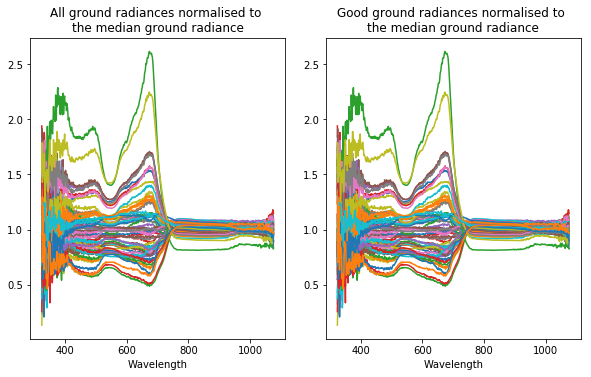

In [11]:
FIG_GroundSpectra.FIG_ground_spectra(all_grounds_spec, all_grounds_spec, output, field_data, fignum)
fignum +=1

### Create time-relative dataframes

gpt = good panels<BR>
gpta = all panels<BR>
adt = good grounds<BR>
adta = all grounds

In [12]:
#gpt, gpta, adt, adta = CreateTimeRelativeDF.create_time_relative_dfs(good_panels, all_panels, good_grounds, all_grounds)

# Figure 

### Plot timelines for ALL panel and ground data, with one line in one panel

In [13]:
#FIG_AllTimelines.FIG_all_timelines(gpta, adta, output, field_data, fignum)
#fignum += 1

# Figure 

### Plot timelines for GOOD panel and ground data, with one line in one panel

In [14]:
#from CalVal.FIG_AllTimelines import panel_plot_layout, multi_timeline_plot

#FIG_GoodTimelines.FIG_good_timelines(gpta, gpt, adt, panel_plot_layout, multi_timeline_plot, output, field_data, fignum)
#fignum += 1

# Figure 

### Create timeline plot of averaged, normalised all/good panels

These plots are used to identify any panels that show unusually bright or dark readings,<BR>
    which can be weeded out as bad panels.
    
The general shape of the curve should follow "insolation" - the changing of incident light
due to the Sun rising/falling in the sky.

In [15]:
#gpt, gpta = FIG_NormalisedPanelsTimeline.normalise_spectra(good_panel_mean, good_panel_spec, all_panel_spec, gpt, gpta)
    
#FIG_NormalisedPanelsTimeline.FIG_normalised_panels_timeline(gpt, gpta, output, field_data, fignum)
#fignum += 1

### Define the K-factor

This reads a standard file with a response curve for the detector, given an ideally white surface.<BR>
Then "k_f" is defined for the K-factor.

In [16]:
#k_f = KFactor.k_factor(panel_dir, in_panel)

### Rename the first spectrum in ALL/GOOD panels to the correct name

Rather than just "radiance", it will be named something like radiance1-0<BR>
for the zeroth spectrum in the first line, for example.    

In [17]:
SpecRename.spec_rename(all_grounds_spec, all_grounds_spec, firstGoodLine, firstGoodPanelSpec, firstGoodGroundSpec)

### Create dataframe with Reflectances

In [18]:
#all_refls = CreateReflectances.create_reflectances(good_panels, good_panel_spec, good_grounds_spec, k_f)

### Test for reflectances
Test field_data to see if the data were saved as reflectances. If so, bypass all the panelling workflow.

In [19]:
if field_data[5] == 'Reflectance':
    all_refls = all_grounds_spec

In [20]:
for i in range(1076, 2501):
    all_refls.loc[i] = all_refls.loc[1075]
for i in range(325, 350):
    all_refls.drop(i, inplace=True)

# Figure 

### Plot all ground reflectances in black, plus the Line-averaged reflectances in colour

The Line-averaged reflectances are shown in order to identify any outlying lines that<BR>

might have been caused by bad panel spectra (for example).

In [21]:
#FIG_Reflectances.FIG_reflectances(all_refls, all_refls, colpac, output, field_data, fignum)
#fignum += 1

### Apply weighted band responses to all reflectances

In [22]:
f_name = sat_resp['Landsat8']
result_ls8_df, band_ls8 = ApplyWeights.apply_weights(f_name, all_refls)
f_name = sat_resp['Sentinel2a']
result_s2a_df, band_s2a = ApplyWeights.apply_weights(f_name, all_refls)
f_name = sat_resp['Sentinel2b']
result_s2b_df, band_s2b = ApplyWeights.apply_weights(f_name, all_refls)

### Reformat band reflectances and apply to dataframe "ground_bands"

In [23]:
ground_bands_ls8 = ReformatDF.reformat_df(alldata, result_ls8_df)
ground_bands_s2a = ReformatDF.reformat_df(alldata, result_s2a_df)
ground_bands_s2b = ReformatDF.reformat_df(alldata, result_s2b_df)

# Figure 

### Plot band reflectances

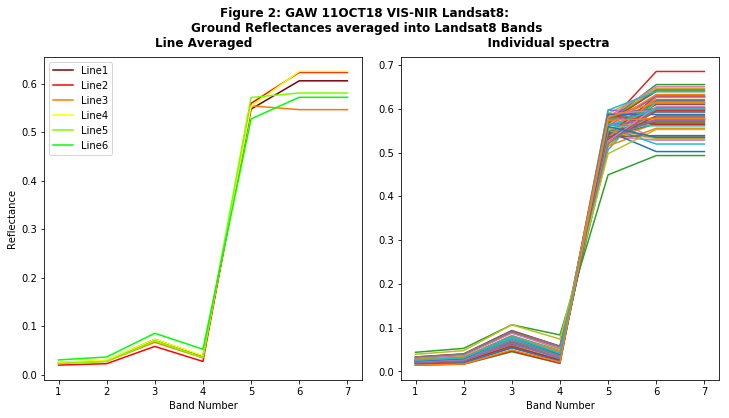

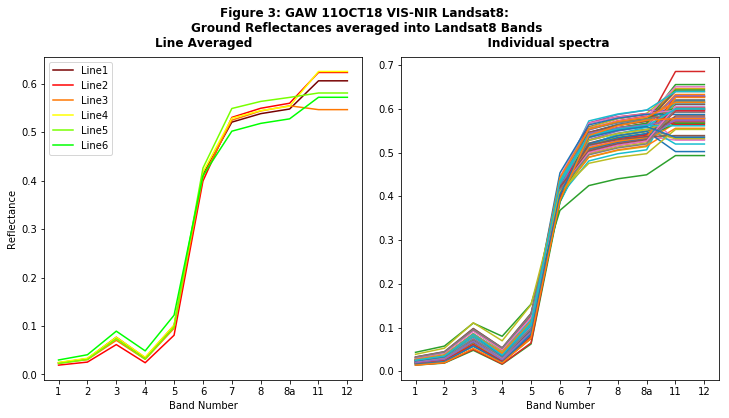

In [24]:
FIG_BandReflectances.FIG_band_reflectances(ground_bands_ls8, result_ls8_df, band_ls8, colpac, output, field_data, fignum)
fignum += 1
FIG_BandReflectances.FIG_band_reflectances(ground_bands_s2a, result_s2a_df, band_s2a, colpac, output, field_data, fignum)
fignum += 1

# Figure

### Histogram of all good spectra, plotted band-by-band

This can be used to identify outlying ground spectra that can be added to bad_grounds in the second cell.

/g/data/v10/public/modules/dea-env/20181015/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  if __name__ == '__main__':


<Figure size 432x288 with 0 Axes>

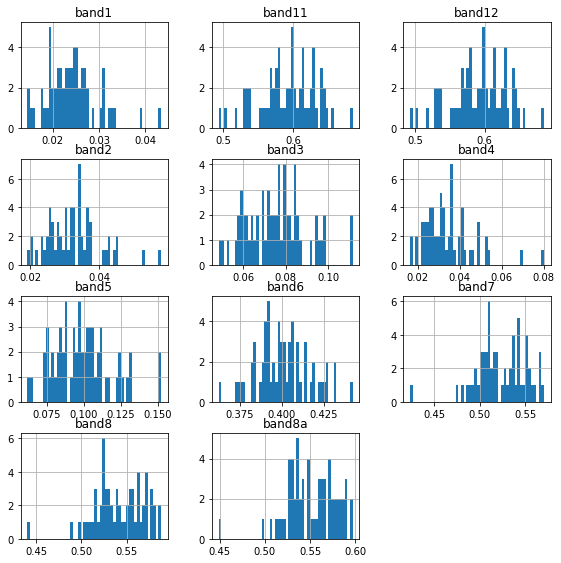

In [25]:
FIG_SpecHistogram.FIG_spec_histogram(ground_bands_s2b, output, field_data, fignum)
fignum += 1

### Outlying ground spectra

Display the spectra with maximum and minimum values. These can be compared to the histograms above<BR>
    to identify any outlying spectra that need to be identified as bad ground spectra.

In [26]:
maxfile = ground_bands_s2b['filename'][(ground_bands_s2b['band1'] == ground_bands_s2b['band1'].max())]
maxbands = ground_bands_s2b.filter(like='band')[(ground_bands_s2b['band1'] == ground_bands_s2b['band1'].max())]
minfile = ground_bands_s2b['filename'][(ground_bands_s2b['band1'] == ground_bands_s2b['band1'].min())]
minbands = ground_bands_s2b.filter(like='band')[(ground_bands_s2b['band1'] == ground_bands_s2b['band1'].min())]

print("Maximum value found in:", maxfile.iloc[0], '\n', maxbands.iloc[0], '\nMinimum value found in:', minfile.iloc[0], '\n', minbands.iloc[0])
#print(ground_bands['filename'][(ground_bands['band1'] == ground_bands['band1'].max())], '\n',ground_bands.filter(like='band')[(ground_bands['band1'] == ground_bands['band1'].max())])
#print(ground_bands['filename'][(ground_bands['band1'] == ground_bands['band1'].min())], '\n',ground_bands.filter(like='band')[(ground_bands['band1'] == ground_bands['band1'].min())])


Maximum value found in: line600001.asd.ref 
 band1     0.043516
band2     0.057838
band3     0.110562
band4     0.080207
band5     0.152330
band6     0.362208
band7     0.423315
band8     0.440097
band8a    0.449034
band11    0.493132
band12    0.493132
Name: 52, dtype: float64 
Minimum value found in: line600010.asd.ref 
 band1     0.014440
band2     0.019989
band3     0.052882
band4     0.019259
band5     0.075173
band6     0.377071
band7     0.536646
band8     0.561243
band8a    0.573754
band11    0.577771
band12    0.577771
Name: 61, dtype: float64


### Determine Solar angle

Based on the spectrum Latitude, Longitude and time stamp, calculate the angle of<BR>
the Sun, with respect to the zenith. Append this number to the "ground_bands" dataframe.

In [27]:
def solar_angle(row):

    loc = coord.EarthLocation(lon=row['Longitude'] * u.deg,
                              lat=row['Latitude'] * u.deg)
    #timy0 = timei.to_pydatetime()
    timy = Time(row['date_saved'], format='datetime')
    
    altaz = coord.AltAz(location=loc, obstime=timy)
    sun = coord.get_sun(timy)

    return sun.transform_to(altaz).zen.degree

ground_bands_ls8['Solar_angle'] = ground_bands_ls8.apply(solar_angle, axis=1)
ground_bands_s2a['Solar_angle'] = ground_bands_s2a.apply(solar_angle, axis=1)
ground_bands_s2b['Solar_angle'] = ground_bands_s2b.apply(solar_angle, axis=1)

### BRDF Calculation

The following script is adapted from FORTRAN code that will calculate the adjusted ASD measurement to 45$^\circ$. This is derived from "MODIS BRDF / Albedo Product: Algorithm Theoretical basis Docuement Version 5.0" by Strahler et al. (1999).

What follows is a key to the variables used in this code, compared to the variables and equations in the document:

hb and br = h/b and b/r . . . . . . . . . . . . . . . crown shape parameters, respectively.<BR>
RL_brdf = R($\theta, \vartheta, \phi, \Lambda$). . . . . . . . . . . . . . (37)<BR>
solar = $\theta$ . . . . . . . . . . . . . . . . . . . . . . . . . . solar zenith angle<BR>
view = $\xi$ . . . . . . . . . . . . . . . . . . . . . . . . . . .view zenith angle<BR>
ra = $\phi$ . . . . . . . . . . . . . . . . . . . . . . . . . . . . view-sun relative azimuth angle<BR>
cosxi = cos $\xi^\prime$ . . . . . . . . . . . . . . . . . . . . . . (43)<BR>
rs_thick = K$_{vol}$ = RossThick kernel . . . . . . (38)<BR>
d_li2 = D$^2$ . . . . . . . . . . . . . . . . . . . . . . . . . (42)<BR>
x_li = tan$\theta^\prime$ tan$\vartheta^\prime$ sin$\phi$ . . . . . . . . . . . . . . .(41) (part of)<BR>
cosl = cos $t$ . . . . . . . . . . . . . . . . . . . . . . . . (41)<BR>
l_li = $t$ . . . . . . . . . . . . . . . . . . . . . . . . . . . . .constrained such that $-1 \leq t \leq 1$<BR>
o_li = O($\theta, \vartheta, \phi$) . . . . . . . . . . . . . . . . . . . .(40)<BR>
li_sparse = K$_{geo}$ . . . . . . . . . . . . . . . . . . . . (39)<BR><BR><BR>

Equations used for the Ross-Li BRDF model:

R($\theta, \vartheta, \phi, \Lambda$) = $f_{iso}(\Lambda) + f_{vol}(\Lambda)\,K_{vol}(\theta, \vartheta, \phi) + f_{geo}(\Lambda)\,K_{geo}(\theta, \vartheta, \phi)$ . . . . . . . . (37)

$K_{vol} = k_{RT} = \frac{(\pi/2 - \xi)\rm{cos}\,\xi + \rm{sin}\,\xi}{\rm{cos}\,\theta + \rm{cos}\,\vartheta} - \frac{\pi}{4}$ . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . (38)
    
$K_{geo} = k_{LSR} = O(\theta, \vartheta, \phi) - {\rm sec}\,\theta^\prime - {\rm sec}\,\vartheta^\prime + \frac{1}{2} (1 + \rm{cos}\,\xi^\prime)\, \rm{sec}\,\theta^\prime \rm{sec}\,\vartheta^\prime$ . . . (39)

$O = \frac{1}{\pi}(t - \rm{sin}\,t\,\,\rm{cos}\,t)(\rm{sec}\,\theta^\prime + \rm{sec}\,\vartheta^\prime)$ . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . (40)

$\rm{cos}\,t = \frac{h}{b}\frac{\sqrt{D^2 + (\rm{tan}\,\theta^\prime\,\,\rm{tan}\,\vartheta^\prime\,\,\rm{sin}\,\phi)^2}}{\rm{sec}\,\theta^\prime + \rm{sec}\,\vartheta^\prime}$ . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . (41)

$D = \sqrt{\rm{tan}^2\,\theta^\prime + \rm{tan}^2\,\vartheta^\prime - 2\,\rm{tan}\,\theta^\prime\,\rm{tan}\,\vartheta^\prime\,\rm{cos}\,\phi}$ . . . . . . . . . . . . . . . . . . . . . . . . . . (42)

$\rm{cos}\,\xi^\prime = \rm{cos}\,\theta^\prime\,\rm{cos}\,\vartheta^\prime + \rm{sin}\,\theta^\prime\,\rm{sin}\,\vartheta^\prime\,\rm{cos}\,\phi$ . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .(43)

$\theta^\prime = \rm{tan}^{-1}(\frac{b}{r}\rm{tan}\,\theta)\,\vartheta^\prime = \rm{tan}^{-1}(\frac{b}{r}\rm{tan}\,\vartheta)$ . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .(44)

In [28]:
ground_brdf_ls8, hb, br = BRDF.ReadAndCalc(brdf_data, ground_bands_ls8, ['','','','Landsat8'])
ground_brdf_s2a, hb, br = BRDF.ReadAndCalc(brdf_data, ground_bands_s2a, ['','','','Sentinel2a'])
ground_brdf_s2b, hb, br = BRDF.ReadAndCalc(brdf_data, ground_bands_s2b, ['','','','Sentinel2b'])

### Choose bands for Landsat 8 and Sentinel satellite data

In [29]:
from CalVal.ApplyWeights import get_spectrum_curve

band_nn = get_spectrum_curve(f_name)
senti_bands = [1,2,3,4,5,6,7,8,'8a',11,12]
ls8_bands = [1,2,3,4,5,6,7]

if field_data[3] == 'Landsat8':
    band_min = [band_nn['band'+str(i)][:, 0].min() for i in ls8_bands]
    band_max = [band_nn['band'+str(i)][:, 0].max() for i in ls8_bands]

elif field_data[3] == 'Sentinel2a' or field_data[3] == 'Sentinel2b':
    band_min = [band_nn['band'+str(i)][:, 0].min() for i in senti_bands]
    band_max = [band_nn['band'+str(i)][:, 0].max() for i in senti_bands]

else:
    print('Satellite name should be one of Landsat8 or Sentinel. I got', field_data[3])

# Figure 

### Plot satellite band extents against median ground spectrum

This plot will show where the satellite bands fall, with respect to the spectrum<BR>
and in particular, with respect to the atmospheric absorbtion features.

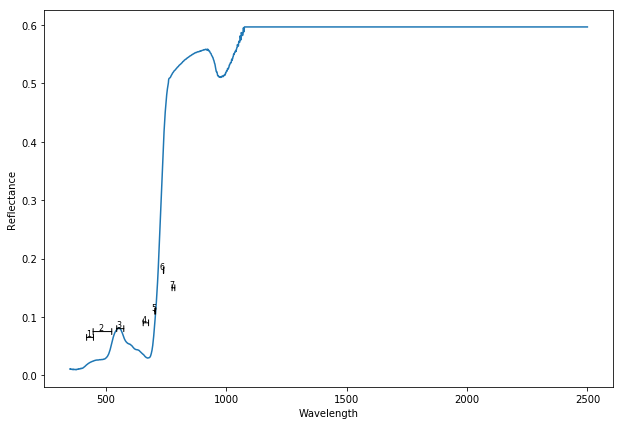

In [30]:
FIG_BandExtents.FIG_band_extents(all_refls, band_min, band_max, output, field_data, fignum)
fignum += 1

### Fudge GPS locations if none exist

In [31]:
ground_brdf_ls8 = FudgeGPS.fudge_gps(ground_brdf_ls8, Corners, RockWalk, StartCorner)
ground_brdf_s2a = FudgeGPS.fudge_gps(ground_brdf_s2a, Corners, RockWalk, StartCorner)
ground_brdf_s2b = FudgeGPS.fudge_gps(ground_brdf_s2b, Corners, RockWalk, StartCorner)

No good GPS Coordinates found, fudging...
No good GPS Coordinates found, fudging...
No good GPS Coordinates found, fudging...


### Query Satellite data

Retrieve xarrays for satellite data, based on which satellite, query area and time.<BR>
sat_array will contain all band data<BR>
sat_bigarray will be a larger version of sat_array, which can be used for context plotting.

In [32]:
ldc, sdc, lquery, squery, lquery2, squery2 = LongQuery.make_long_query(ground_brdf_ls8)

ls8_array, s2a_array, s2b_array, ls8_bigarray, s2a_bigarray, s2b_bigarray = CreateLongArrays.create_long_arrays_nomask(ldc, sdc, lquery, squery, lquery2, squery2)

# Figure 

### Plot relative locations of field and satellite data

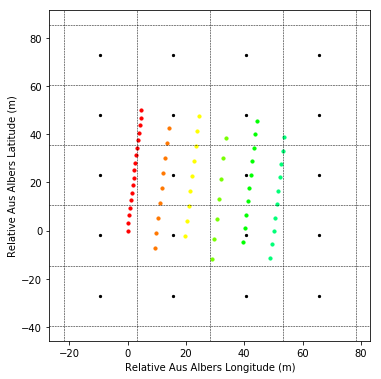

In [33]:
xloc = FIG_SatFieldLocations.FIG_sat_field_locations(ground_brdf_ls8, ls8_array, colpac, output, field_data, fignum)
fignum +=1

### Create Field full band xarray

The field xarray is based on the pixel locations of the satellite data, where each pixel<BR>
    contains an average of all field data measurements that fall within the pixel.

In [34]:
field_array_ls8, field_array_s2a = CreateManyFieldFromSat.create_many_field_from_sat(ls8_array, s2a_array, ground_brdf_ls8, ground_brdf_s2a, xloc)

# Figure 

### Plot large-area context RGB array for Satellite data

Landsat 8


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

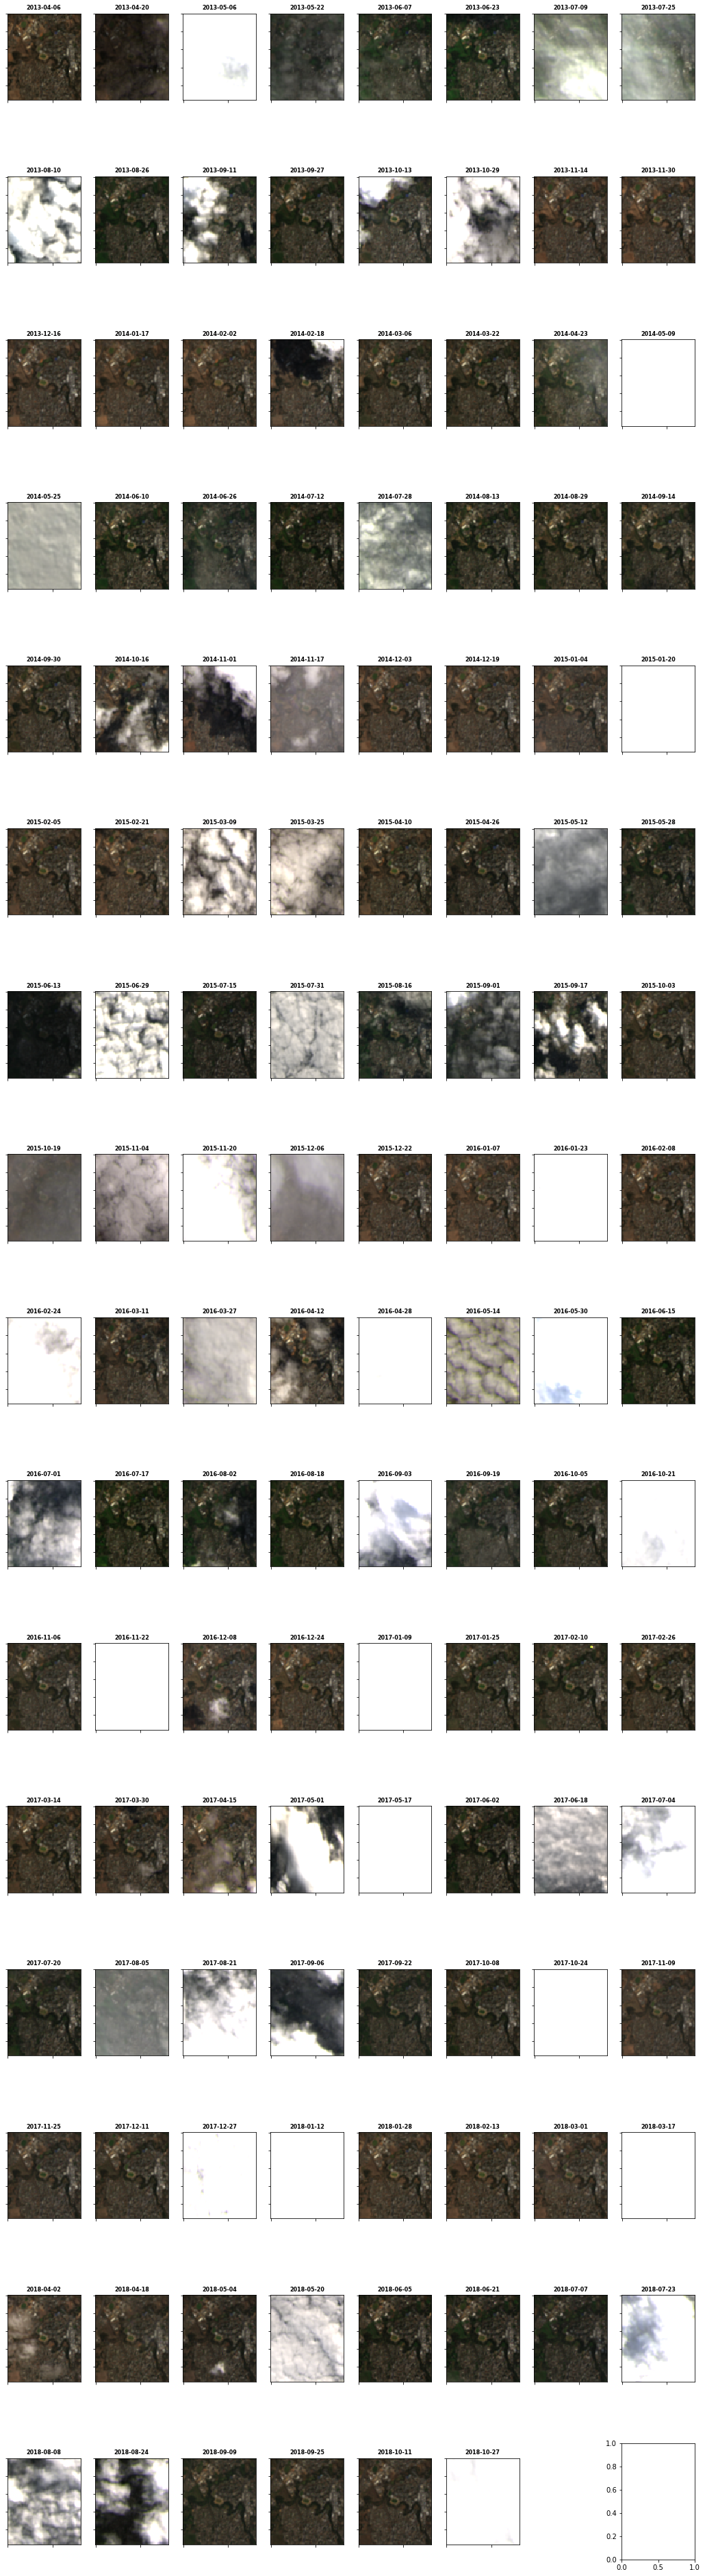

In [35]:
FIG_ManyLS8RGB.FIG_many_LS8RGB(ls8_bigarray, output, field_data, fignum)
fignum += 1

Sentinel 2a


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

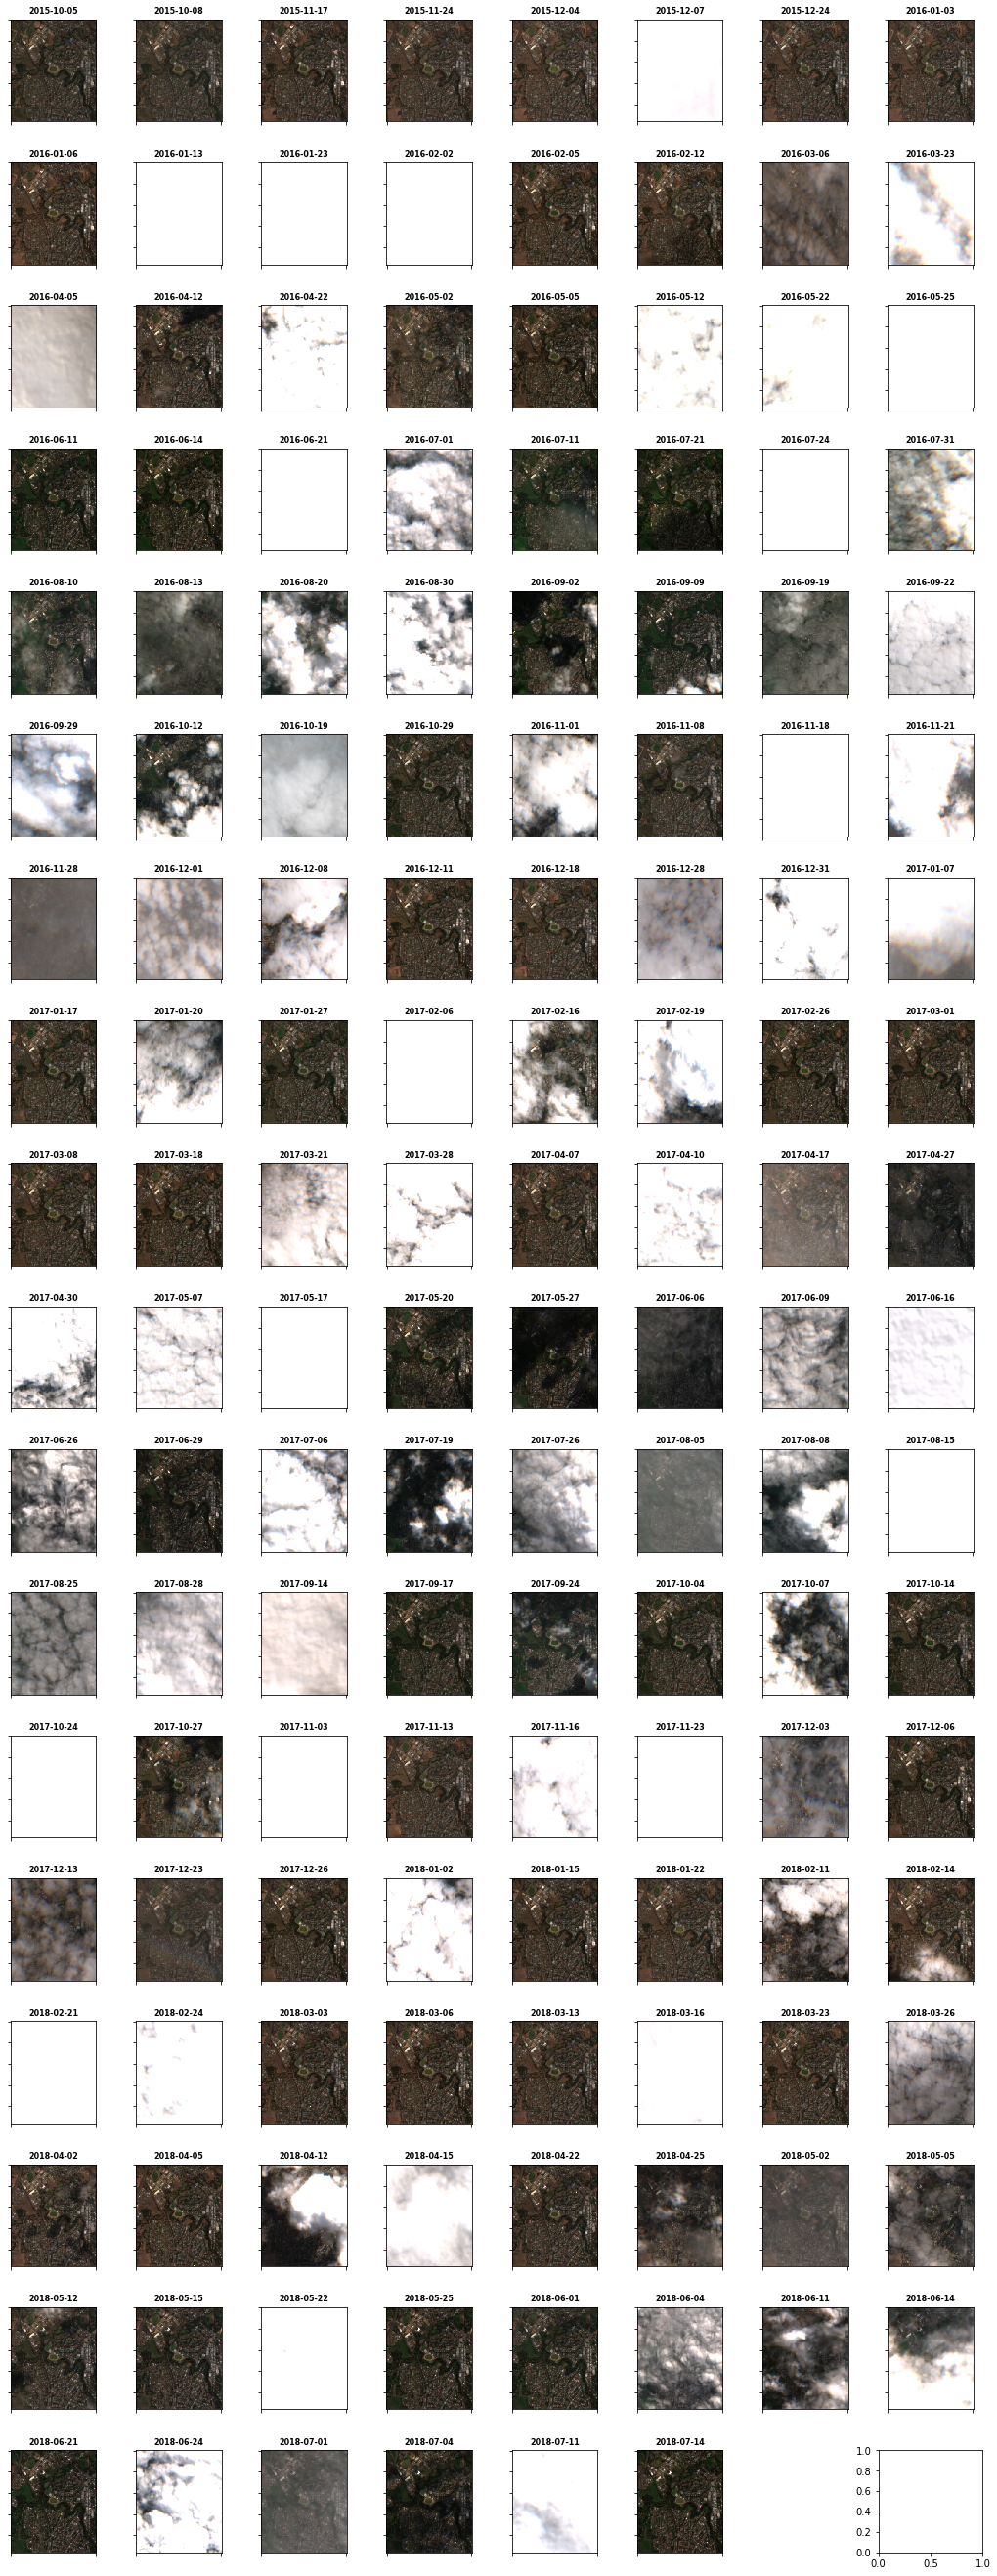

In [36]:
FIG_ManyS2ARGB.FIG_many_S2ARGB(s2a_bigarray, output, field_data, fignum)
fignum += 1

Sentinel 2b


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

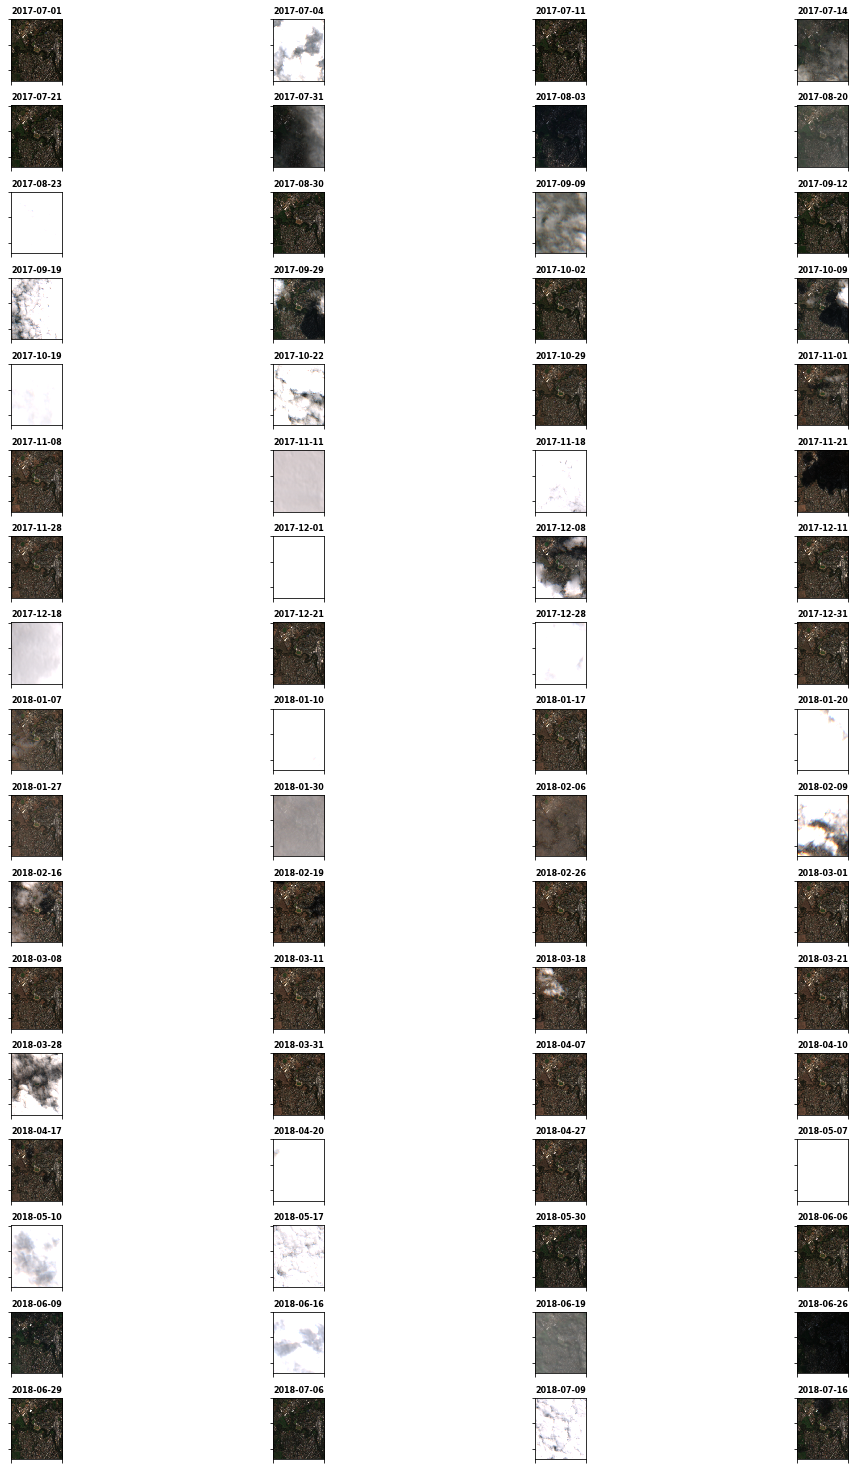

In [37]:
FIG_ManyS2BRGB.FIG_many_S2BRGB(s2b_bigarray, output, field_data, fignum)
fignum += 1

# Figure 

### Plot RGB array for Field data

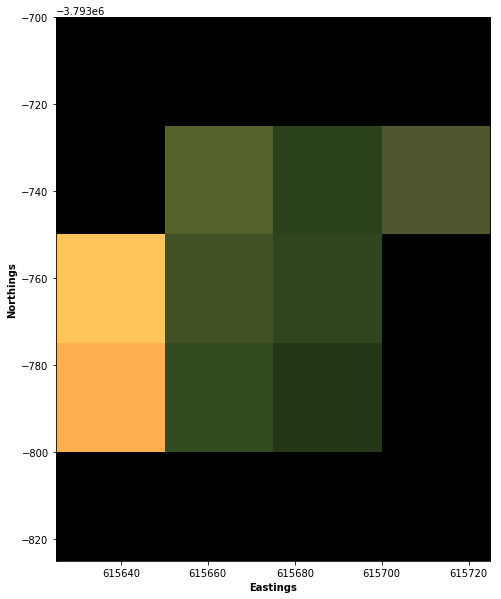

In [38]:
FIG_FieldRGB.FIG_field_RGB(field_array_ls8, output, field_data, fignum)
fignum += 1

### Create a statistics dataframe, comparing satellite and field data

In [48]:
fls8_df, fs2a_df, fs2b_df = CreateManyStats.create_manystats(ls8_array, s2a_array, s2b_array, ls8_bad_days, s2a_bad_days, s2b_bad_days, ground_brdf_ls8, ground_brdf_s2a, field_data)

# Figure

### Plot comparison spectra of satellite and field data, on a pixel-by-pixel basis

Error bars are shown for the satellite and field data, based on the standard deviation of the pixels
within the field. The black line shows the satellite data, which has been averaged over all pixels that satisfy the Datacube query ie. all pixels shown in Figure 11. The orange line shows satellite data which has been averaged over only those pixels that overlap with at least one field measurement.

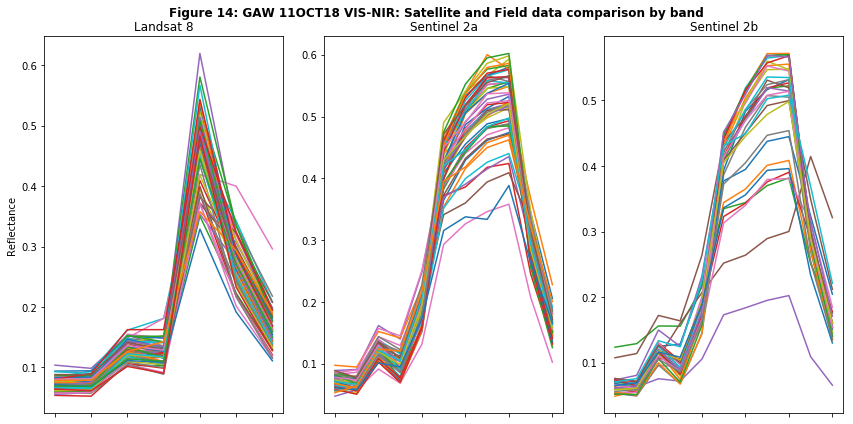

In [49]:
FIG_ManySatFieldBands.FIG_many_sat_field_bands(ls8_array, s2a_array, s2b_array, fls8_df, fs2a_df, fs2b_df, output, field_data, fignum)
fignum += 1

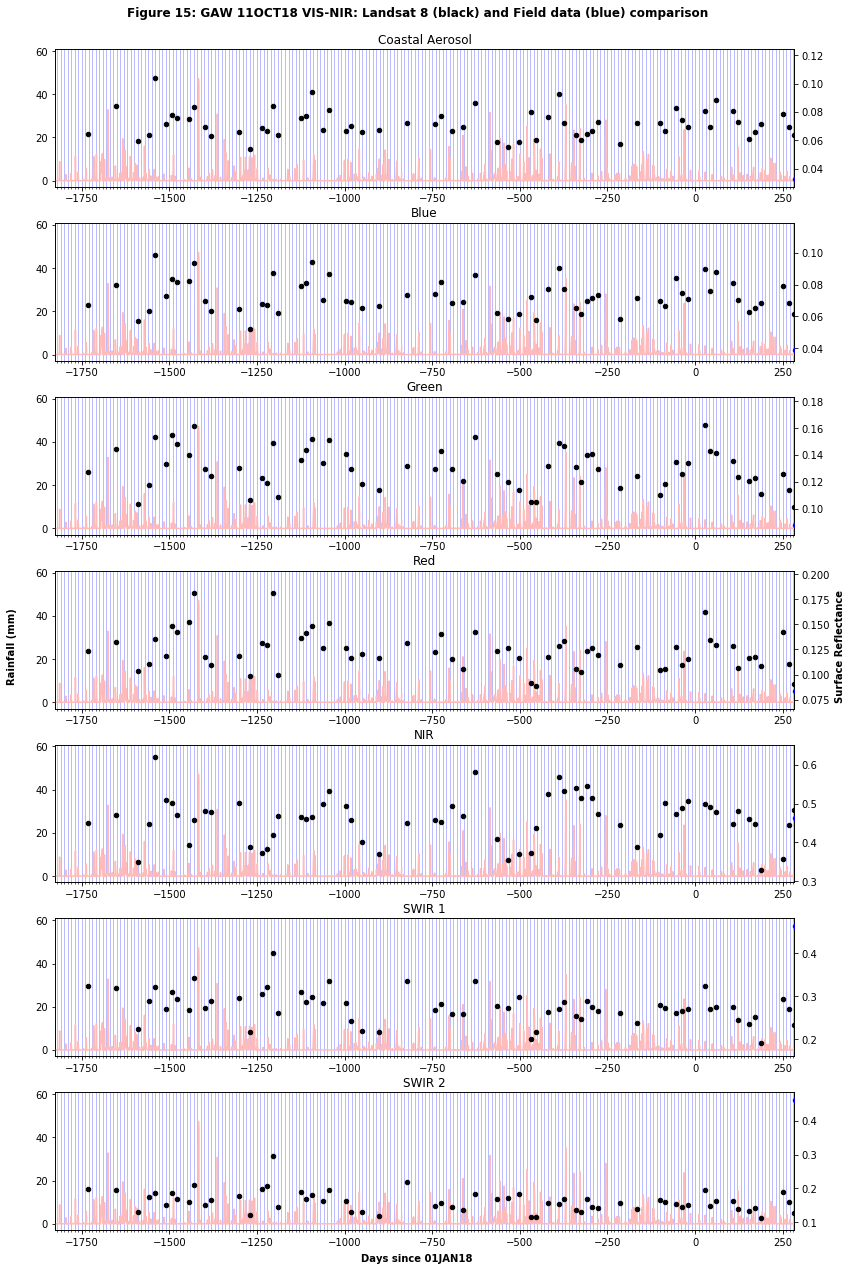

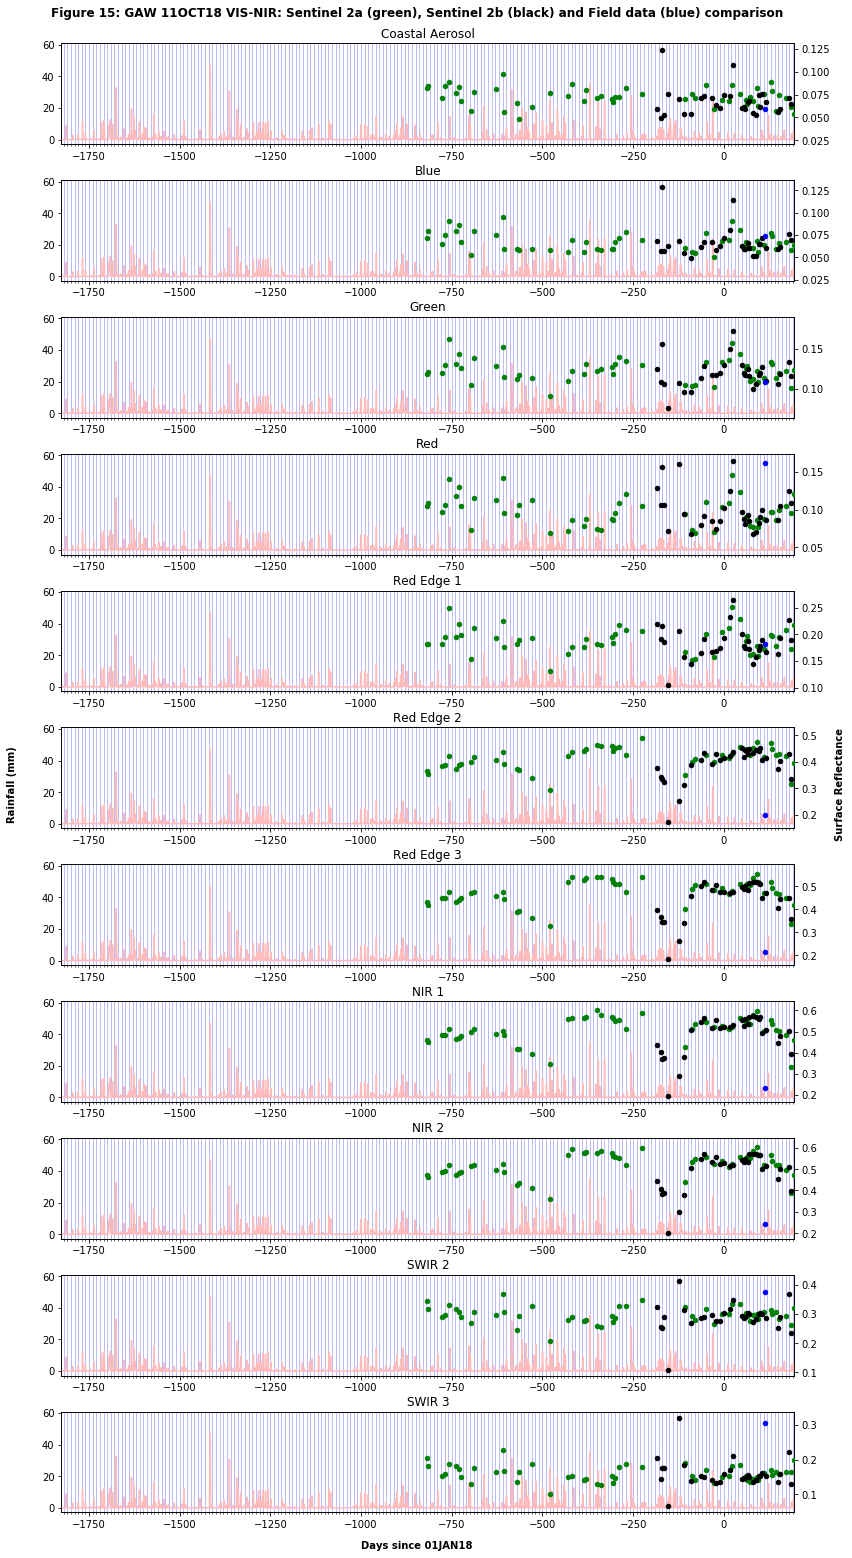

In [50]:
FIG_MultiTimeLine.FIG_multi_time_line(fls8_df, fs2a_df, fs2b_df, ls8_csvs, sent_csvs, rain_dat, field_data, output, fignum)
fignum+=1

In [51]:
dd0_ls8, dd1_ls8, dd0_s2a, dd1_s2a, dd0_s2b, dd1_s2b = CalcStats.calc_stats(fls8_df, fs2a_df, fs2b_df)

LANDSAT 8: Number of adjacent overpasses: 64
Landsat 8 Surface Reflectance for Band 1 is 0.072+/-0.013 (17.93%)
Landsat 8 Surface Reflectance for Band 2 is 0.074+/-0.012 (16.54%)
Landsat 8 Surface Reflectance for Band 3 is 0.132+/-0.016 (12.2%)
Landsat 8 Surface Reflectance for Band 4 is 0.127+/-0.024 (19.19%)
Landsat 8 Surface Reflectance for Band 5 is 0.464+/-0.053 (11.32%)
Landsat 8 Surface Reflectance for Band 6 is 0.281+/-0.043 (15.32%)
Landsat 8 Surface Reflectance for Band 7 is 0.165+/-0.041 (24.62%)

SENTINEL 2a: Number of adjacent overpasses: 52
Sentinel 2a Surface Reflectance for Band 1 is 0.073+/-0.015 (20.01%)
Sentinel 2a Surface Reflectance for Band 2 is 0.066+/-0.013 (19.41%)
Sentinel 2a Surface Reflectance for Band 3 is 0.122+/-0.017 (13.59%)
Sentinel 2a Surface Reflectance for Band 4 is 0.094+/-0.019 (20.04%)
Sentinel 2a Surface Reflectance for Band 5 is 0.186+/-0.026 (14.07%)
Sentinel 2a Surface Reflectance for Band 6 is 0.421+/-0.032 (7.71%)
Sentinel 2a Surface Reflec

In [52]:
MultiTimeLineDry.multi_time_line_dry(fls8_df, fs2a_df, fs2b_df, ls8_csvs, sent_csvs, rain_dat, field_data, output, fignum)

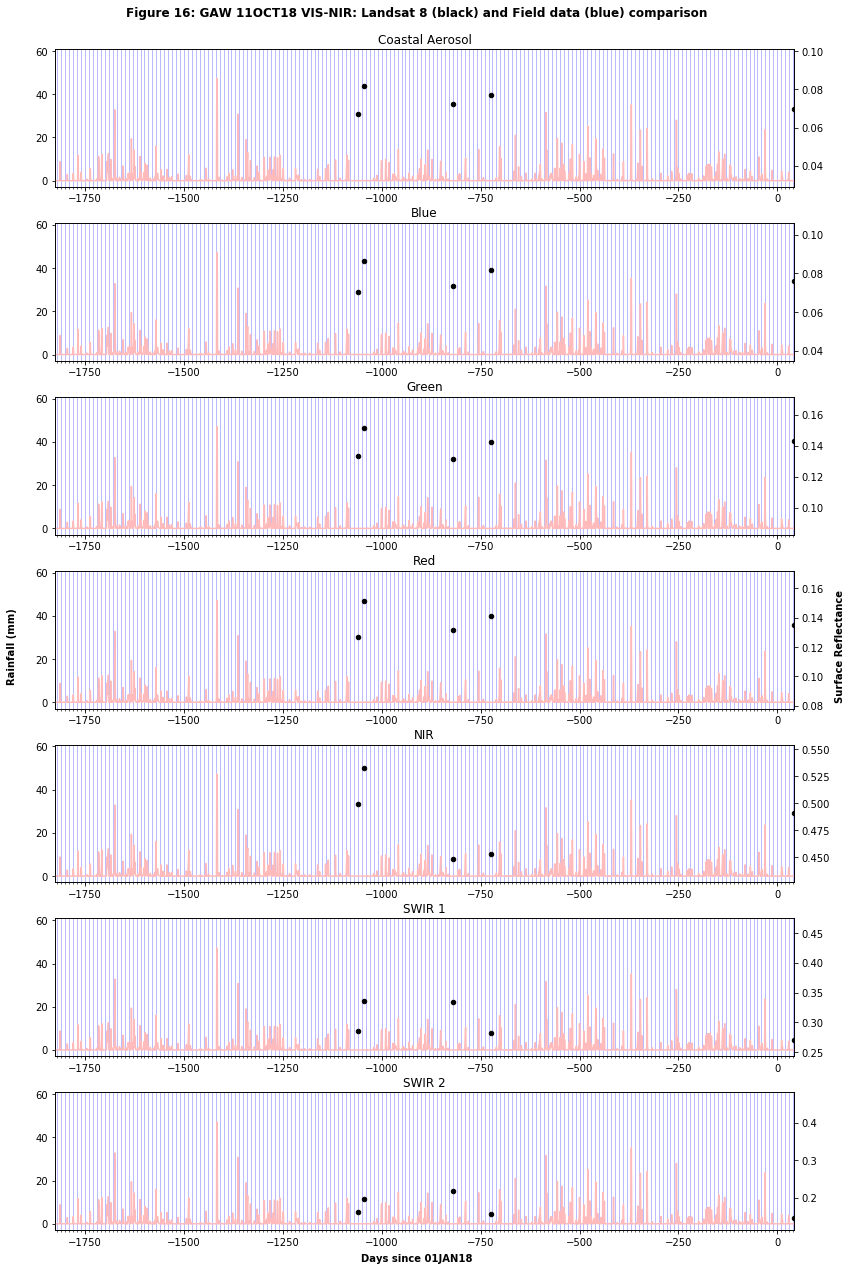

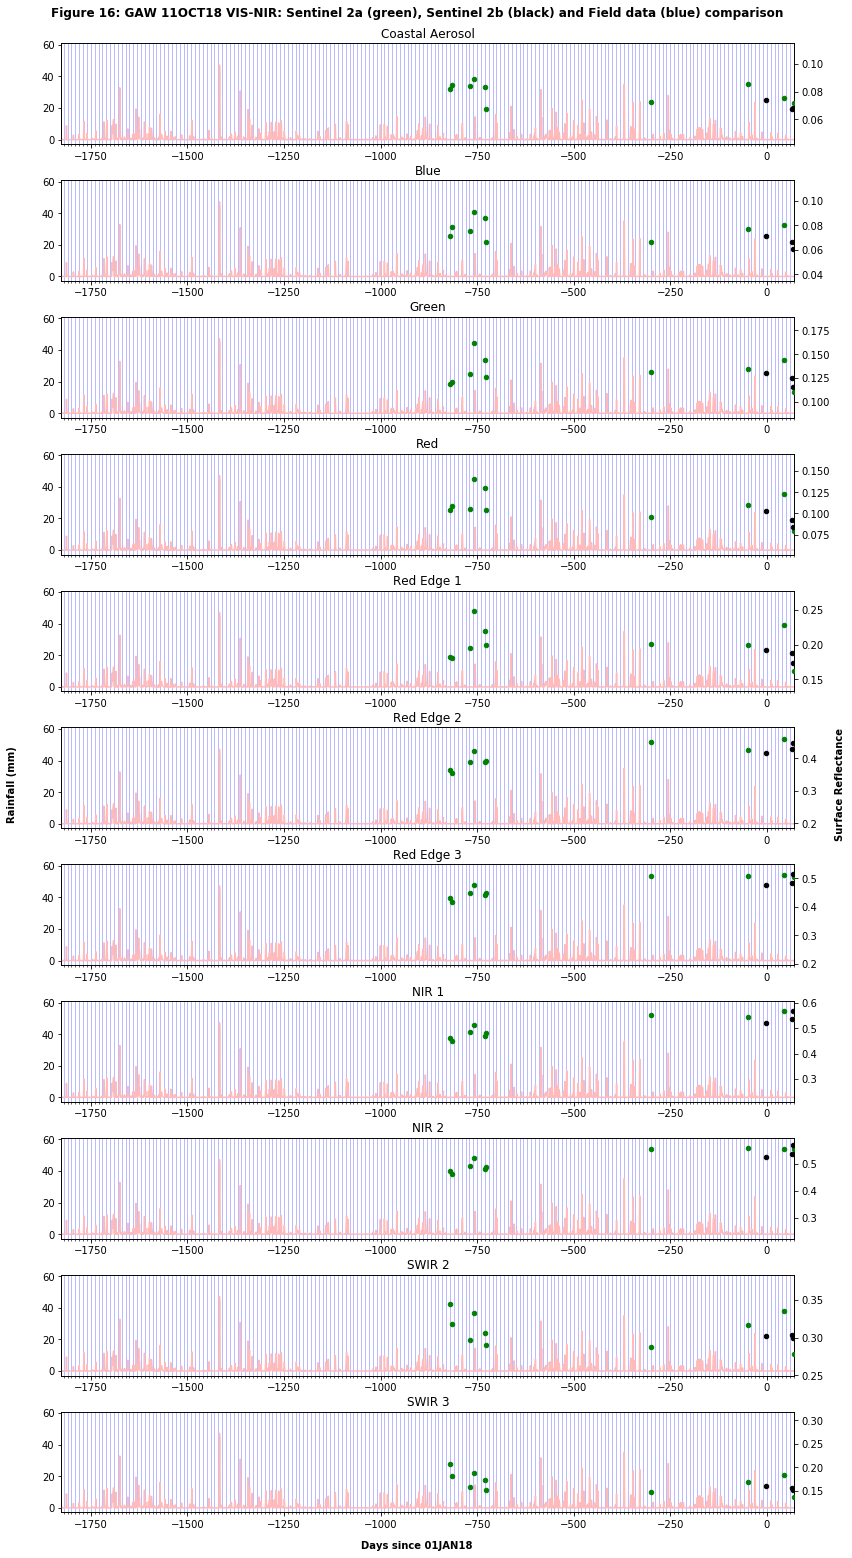

In [53]:
FIG_MultiTimeLine.FIG_multi_time_line(fls8_df, fs2a_df, fs2b_df, ls8_csvs, sent_csvs, rain_dat, field_data, output, fignum)
fignum+=1

In [54]:
dd0_ls8, dd1_ls8, dd0_s2a, dd1_s2a, dd0_s2b, dd1_s2b = CalcStats.calc_stats(fls8_df, fs2a_df, fs2b_df)

LANDSAT 8: Number of adjacent overpasses: 5
Landsat 8 Surface Reflectance for Band 1 is 0.067+/-nan (nan%)
Landsat 8 Surface Reflectance for Band 2 is 0.071+/-nan (nan%)
Landsat 8 Surface Reflectance for Band 3 is 0.134+/-nan (nan%)
Landsat 8 Surface Reflectance for Band 4 is 0.127+/-nan (nan%)
Landsat 8 Surface Reflectance for Band 5 is 0.5+/-nan (nan%)
Landsat 8 Surface Reflectance for Band 6 is 0.286+/-nan (nan%)
Landsat 8 Surface Reflectance for Band 7 is 0.163+/-nan (nan%)

SENTINEL 2a: Number of adjacent overpasses: 10
Sentinel 2a Surface Reflectance for Band 1 is 0.083+/-0.011 (13.6%)
Sentinel 2a Surface Reflectance for Band 2 is 0.078+/-0.018 (23.68%)
Sentinel 2a Surface Reflectance for Band 3 is 0.131+/-0.025 (19.13%)
Sentinel 2a Surface Reflectance for Band 4 is 0.113+/-0.03 (26.59%)
Sentinel 2a Surface Reflectance for Band 5 is 0.199+/-0.038 (19.22%)
Sentinel 2a Surface Reflectance for Band 6 is 0.38+/-0.023 (6.13%)
Sentinel 2a Surface Reflectance for Band 7 is 0.44+/-0.02 (

## How long did this notebook take to run?

In [55]:
import datetime
print("This Notebook took ", str(datetime.timedelta(seconds=int((time.time() - start_time)))), "(h:m:s) to run")

This Notebook took  0:01:40 (h:m:s) to run
